# PROYECTO FINAL MODULO 5: ENTRENAMIENTO DE MODELO DE MACHINE LEARNING PARA DETERMINAR SI UN PACIENTE SUFRE DE ANEMINA

## AUTOR: MIGUEL HUAYANEY MILLA

### FUENTE: [DATOS ABIERTOS](https://www.datosabiertos.gob.pe/dataset/morbilidad-anemia)

In [ ]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 6.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_anemia = pd.read_csv('/content/TB_ANEMIA.csv',sep=';')
df_anemia.head(10)

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
0,40971314,2,A,M,NaN,20230522,D649,D,6203
1,39270343,4,A,M,1128.0,20211122,D509,D,10836
2,39270343,4,A,M,1128.0,20211129,D509,D,10836
3,39155787,3,A,F,1128.0,20210527,D509,D,10836
4,36178995,2,A,F,1299.0,20210215,D509,D,6079
5,38926264,4,A,M,1506.0,20211113,D509,D,7475
6,39141175,1,A,M,1128.0,20210220,D509,D,6856
7,40229751,2,A,M,1278.0,20221120,D509,D,4416
8,39603123,1,A,M,1278.0,20210428,D509,D,4416
9,39105165,1,A,M,1128.0,20210106,D509,D,10836


# EDA

In [ ]:
df_anemia.shape

(1327924, 9)

In [ ]:
df_anemia.dtypes

,0
id_persona,int64
Edad,int64
Tipo_edad,object
Sexo,object
id_ubigeo,float64
Fecha_atencion,int64
Diagnostico,object
Tipo_Dx,object
id_eess,int64


## TRATAMIENTO DE NULOS

In [ ]:
df_anemia.isnull().sum().sum()

10817

In [ ]:
df_anemia.isnull().sum()

,0
id_persona,0
Edad,0
Tipo_edad,0
Sexo,0
id_ubigeo,10817
Fecha_atencion,0
Diagnostico,0
Tipo_Dx,0
id_eess,0


In [ ]:
df_anemia.dropna(subset=['id_ubigeo'],inplace=True)
df_anemia.shape

(1317107, 9)

## TRATAMIENTO DE DUPLICADOS

In [ ]:
df_anemia.duplicated().sum()

19287

In [ ]:
df_anemia[df_anemia.duplicated()]

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
329,38985611,1,A,F,26.0,20210716,D509,D,5081
369,38942468,1,A,M,42.0,20210627,D509,D,5183
610,38954543,2,A,F,42.0,20211210,D509,D,5180
612,38954543,2,A,F,42.0,20211110,D509,D,5180
827,39153550,2,A,F,26.0,20220329,D509,D,6977
...,...,...,...,...,...,...,...,...,...
1327513,35766370,2,A,F,1283.0,20210820,D509,D,5882
1327576,26591876,2,A,F,675.0,20211108,D509,D,4574
1327624,23789774,1,A,F,1288.0,20210309,D509,D,5995
1327878,33283345,4,A,M,1414.0,20240120,D509,D,5656


In [ ]:
df_anemia.drop_duplicates(keep='first',inplace=True)
df_anemia.shape

(1297820, 9)

# ANALIZANDO VARIABLES

## ELIMINAMOS ID_PERSONA

In [ ]:
df_anemia.drop(['id_persona'],axis=1,inplace=True)
df_anemia.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
1,4,A,M,1128.0,20211122,D509,D,10836
2,4,A,M,1128.0,20211129,D509,D,10836
3,3,A,F,1128.0,20210527,D509,D,10836
4,2,A,F,1299.0,20210215,D509,D,6079
5,4,A,M,1506.0,20211113,D509,D,7475
6,1,A,M,1128.0,20210220,D509,D,6856
7,2,A,M,1278.0,20221120,D509,D,4416
8,1,A,M,1278.0,20210428,D509,D,4416
9,1,A,M,1128.0,20210106,D509,D,10836
10,1,A,M,1128.0,20210107,D509,D,10836


## CONVERTIMOS DATA DE EDAD A AÑOS

In [ ]:
df_anemia.Tipo_edad.value_counts()

,count
Tipo_edad,
A,920953
M,375857
D,1010


In [ ]:
df_anemia['edad_total'] = np.where(
    df_anemia['Tipo_edad'] == 'M', df_anemia['Edad'] / 12,
    np.where(df_anemia['Tipo_edad'] == 'D', df_anemia['Edad'] / 365, df_anemia['Edad'])
)
df_anemia[df_anemia['Tipo_edad'] == 'D'].head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total
1775,1,D,F,1477.0,20210106,D509,D,125,0.002740
4616,1,D,F,1128.0,20210531,D509,D,10836,0.002740
5149,20,D,M,994.0,20210608,D539,D,3364,0.054795
6450,6,D,F,1464.0,20210213,D509,D,212,0.016438
6694,1,D,M,774.0,20220225,D509,D,2435,0.002740
6740,24,D,F,1866.0,20210423,D509,D,5513,0.065753
7054,1,D,M,1460.0,20210805,D509,D,16,0.002740
7144,9,D,F,1274.0,20211204,D509,D,4432,0.024658
7177,17,D,F,1248.0,20220322,D509,D,4327,0.046575
7248,16,D,M,1484.0,20210308,D500,D,146,0.043836


## ANALIZAMOS ID_UBIGEO

In [ ]:
df_anemia['id_ubigeo'].value_counts()

,count
id_ubigeo,
1312.0,33487
1283.0,20689
1290.0,13846
1863.0,13049
1323.0,13029
...,...
1842.0,1
320.0,1
1841.0,1


In [ ]:
df_ubigeos = pd.read_csv('/content/TB_UBIGEOS.csv',sep=';')
df_ubigeos.head(10)

,id_ubigeo,ubigeo_reniec,ubigeo_inei,departamento_inei,departamento,provincia_inei,provincia,distrito,region,macroregion_inei,macroregion_minsa,iso_3166_2,fips,superficie,altitud,latitud,longitud,Frontera
0,1,10101.0,10101,1,AMAZONAS,101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,154.0,2338.0,-6.2294,-77.8728,NO
1,2,10102.0,10102,1,AMAZONAS,101,CHACHAPOYAS,ASUNCION,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,26.0,2823.0,-6.0325,-77.7108,NO
2,3,10103.0,10103,1,AMAZONAS,101,CHACHAPOYAS,BALSAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,357.0,859.0,-6.8358,-78.0197,NO
3,4,10104.0,10104,1,AMAZONAS,101,CHACHAPOYAS,CHETO,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,57.0,2143.0,-6.2556,-77.7008,NO
4,5,10105.0,10105,1,AMAZONAS,101,CHACHAPOYAS,CHILIQUIN,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,143.0,2677.0,-6.0783,-77.7375,NO
5,6,10106.0,10106,1,AMAZONAS,101,CHACHAPOYAS,CHUQUIBAMBA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,279.0,2803.0,-6.9350,-77.8542,NO
6,7,10107.0,10107,1,AMAZONAS,101,CHACHAPOYAS,GRANADA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,181.0,3041.0,-6.1064,-77.6286,NO
7,8,10108.0,10108,1,AMAZONAS,101,CHACHAPOYAS,HUANCAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,49.0,2591.0,-6.1736,-77.8644,NO
8,9,10109.0,10109,1,AMAZONAS,101,CHACHAPOYAS,LA JALCA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,380.0,2869.0,-6.4847,-77.8150,NO
9,10,10110.0,10110,1,AMAZONAS,101,CHACHAPOYAS,LEIMEBAMBA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,373.0,2226.0,-6.7075,-77.8039,NO


In [ ]:
df_anemia_ubigeo = df_ubigeos[['id_ubigeo','departamento']].copy()
df_anemia_ubigeo.head()

,id_ubigeo,departamento
0,1,AMAZONAS
1,2,AMAZONAS
2,3,AMAZONAS
3,4,AMAZONAS
4,5,AMAZONAS


In [ ]:
df_anemia = df_anemia.merge(df_anemia_ubigeo,on='id_ubigeo',how='left')
df_anemia.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,departamento
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,JUNIN
1,4,A,M,1128.0,20211129,D509,D,10836,4.0,JUNIN
2,3,A,F,1128.0,20210527,D509,D,10836,3.0,JUNIN
3,2,A,F,1299.0,20210215,D509,D,6079,2.0,LIMA
4,4,A,M,1506.0,20211113,D509,D,7475,4.0,MADRE DE DIOS
5,1,A,M,1128.0,20210220,D509,D,6856,1.0,JUNIN
6,2,A,M,1278.0,20221120,D509,D,4416,2.0,LAMBAYEQUE
7,1,A,M,1278.0,20210428,D509,D,4416,1.0,LAMBAYEQUE
8,1,A,M,1128.0,20210106,D509,D,10836,1.0,JUNIN
9,1,A,M,1128.0,20210107,D509,D,10836,1.0,JUNIN


In [ ]:
df_anemia['cie10'] = np.where(df_anemia['Diagnostico'].str.startswith(('D50','D53','D64')),1,0)

In [ ]:
df_anemia.head(3)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,departamento,cie10
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,JUNIN,1
1,4,A,M,1128.0,20211129,D509,D,10836,4.0,JUNIN,1
2,3,A,F,1128.0,20210527,D509,D,10836,3.0,JUNIN,1


In [ ]:
df_anemia['Fecha_atencion'] = df_anemia['Fecha_atencion'].astype(str)
df_anemia['mes'] = df_anemia['Fecha_atencion'].str[4:6]
df_anemia.head(1)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,departamento,cie10,mes
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,JUNIN,1,11


In [ ]:
df_anemia_processed = df_anemia[['mes','Sexo','departamento','edad_total','cie10']].copy()
df_anemia_processed.rename(columns={'Sexo':'sexo','departamento':'dpto','edad_total':'edad','cie10':'anemia'},inplace=True)
df_anemia_processed.head()

,mes,sexo,dpto,edad,anemia
0,11,M,JUNIN,4.0,1
1,11,M,JUNIN,4.0,1
2,05,F,JUNIN,3.0,1
3,02,F,LIMA,2.0,1
4,11,M,MADRE DE DIOS,4.0,1


# CODIFICACIÓN DE VARIABLES CATEGORICAS

In [ ]:
df_final = df_anemia_processed.copy()

In [ ]:
df_final['dpto'].value_counts()

,count
dpto,
LIMA,261381
LORETO,135932
PIURA,75907
LAMBAYEQUE,75647
CUSCO,75060
LA LIBERTAD,71621
ANCASH,69953
CAJAMARCA,59662
UCAYALI,57220


In [ ]:
!pip install category-encoders
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
encoder_ordinal = ce.OrdinalEncoder(cols=['dpto'])
df_final = encoder_ordinal.fit_transform(df_final)
df_final

,mes,sexo,dpto,edad,anemia
0,11,M,1,4.0,1
1,11,M,1,4.0,1
2,05,F,1,3.0,1
3,02,F,2,2.0,1
4,11,M,3,4.0,1
...,...,...,...,...,...
1297815,08,F,2,6.0,1
1297816,02,M,6,9.0,1
1297817,03,F,2,1.0,1
1297818,04,F,2,1.0,1


In [ ]:
encoder_one_hot = ce.OneHotEncoder(cols=['sexo'])
df_final = encoder_one_hot.fit_transform(df_final)
df_final

,mes,sexo_1,sexo_2,dpto,edad,anemia
0,11,1,0,1,4.0,1
1,11,1,0,1,4.0,1
2,05,0,1,1,3.0,1
3,02,0,1,2,2.0,1
4,11,1,0,3,4.0,1
...,...,...,...,...,...,...
1297815,08,0,1,2,6.0,1
1297816,02,1,0,6,9.0,1
1297817,03,0,1,2,1.0,1
1297818,04,0,1,2,1.0,1


In [ ]:
df_final.rename(columns={'sexo_1':'male','sexo_2':'female'},inplace=True)
df_final.head()

,mes,male,female,dpto,edad,anemia
0,11,1,0,1,4.0,1
1,11,1,0,1,4.0,1
2,05,0,1,1,3.0,1
3,02,0,1,2,2.0,1
4,11,1,0,3,4.0,1


# PREPARACIÓN DE DATOS PARA ENTRENAMIENTO

## DEFINICIÓN DE VARIABLES

In [ ]:
X = df_final.drop(columns=['anemia'])
y = df_final['anemia']

## ESCALAMIENTO DE DATOS

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## CORRELACIONES

In [ ]:
corr_matrix = df_final.corr()
corr_anemia = corr_matrix['anemia']
corr_anemia.sort_values(ascending=False)

,anemia
anemia,1.000000
dpto,0.014421
male,0.001098
female,-0.001098
mes,-0.003116
edad,-0.040197


<Axes: >

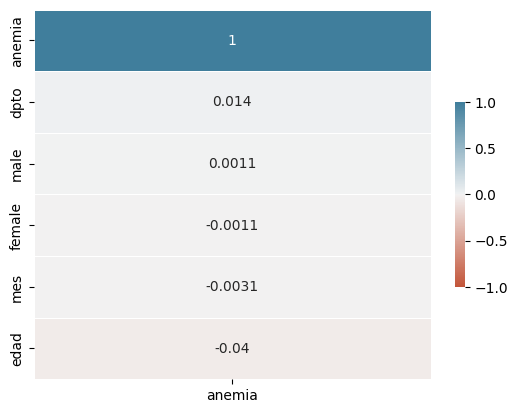

In [ ]:
sns.heatmap(
    data=corr_anemia.sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

# ENTRENAMIENTO DE MODELOS

## 01. REGRESIÓN LOGISTICA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression(max_iter=500)
result = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f'accuracy : {metrics.accuracy_score(y_test,y_pred)}')

accuracy : 0.9977385153565209


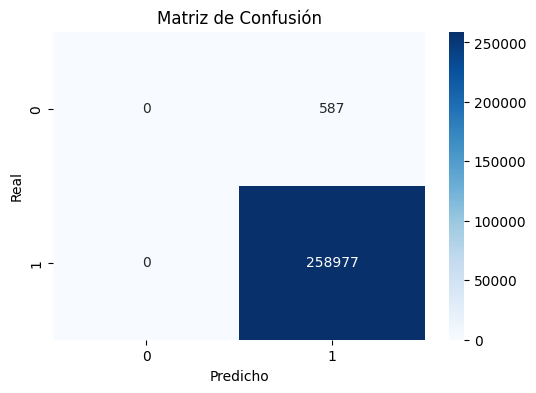

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

## 02. ÁRBOLES DE DECISIÓN

### SIN PARÁMETROS:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree1 = DecisionTreeClassifier()
tree1.fit(X_train,y_train)
y_pred = tree1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy TREE 1 : {accuracy}')

Accuracy TREE 1 : 0.9976730209119908


### EVALUANDO LA MEJOR COMBINACIÓN DE PARÁMETROS

In [ ]:
from sklearn.model_selection import GridSearchCV

# definirmos varios parametros
param_grid = {
    'max_depth': [3,4,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}

clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)

print("Mejores parametros : ",grid_search.best_params_)

Mejores parametros :  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy best model : {accuracy}')

Accuracy best model : 0.9977385153565209


### VARIABLE MÁS IMPORTANTE

In [ ]:
importances = best_model.feature_importances_
importances

array([0.02807993, 0.        , 0.        , 0.26676015, 0.70515992])

<ipython-input-53-01296aa07d05>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['mes', 'male', 'female', 'dpto','edad'],y=importances,palette='bright',saturation= 2.0,edgecolor='black',linewidth=2)


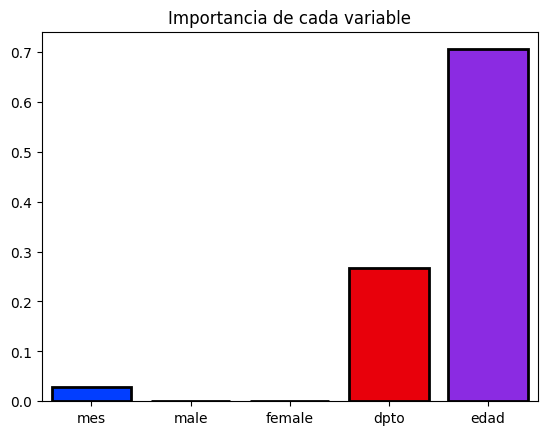

In [ ]:
sns.barplot(x=['mes', 'male', 'female', 'dpto','edad'],y=importances,palette='bright',saturation= 2.0,edgecolor='black',linewidth=2)
plt.title('Importancia de cada variable')
plt.show()

### VERIFICAR EL OVERFITING

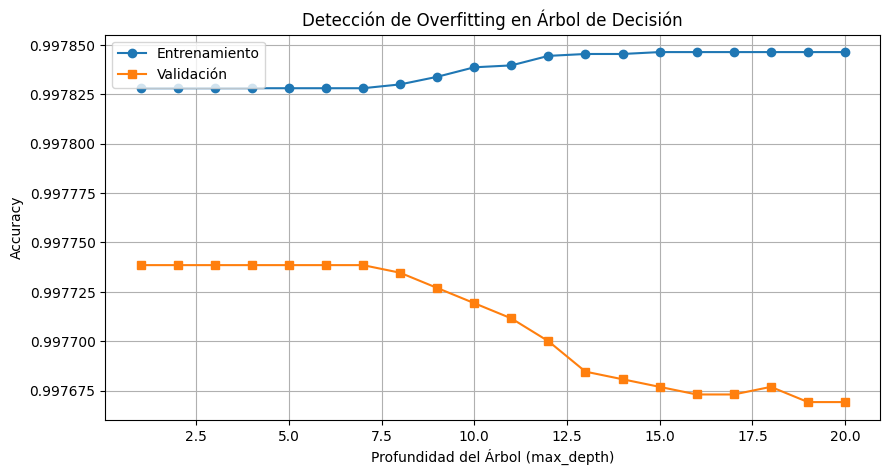

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Datos (usamos X, y de tu dataset)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_scores = []
val_scores = []
max_depths = range(1, 21)  # Profundidades de 1 a 20

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Evaluamos en los conjuntos de entrenamiento y validación
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))

    train_scores.append(train_acc)
    val_scores.append(val_acc)

# Graficamos las curvas de accuracy
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_scores, label="Entrenamiento", marker='o')
plt.plot(max_depths, val_scores, label="Validación", marker='s')
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("Accuracy")
plt.title("Detección de Overfitting en Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.show()

## 03. RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.4 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

In [ ]:
# Definir los rangos de hiperparámetros
param_space = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(10, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2'])
}

# Instancia del modelo
rf = RandomForestClassifier(random_state=42)

# Optimización bayesiana
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space,
                             n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Entrenar con los datos
bayes_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores parámetros:", bayes_search.best_params_)
print("Mejor puntuación:", bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
model = RandomForestClassifier(max_depth=26,max_features='log2',min_samples_leaf=9,min_samples_split=8,n_estimators=218,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=26, max_features='log2', min_samples_leaf=9,
                       min_samples_split=8, n_estimators=218, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(f'El accuracy en train es : {train_accuracy}')
print(f'El accuracy en test est : {test_accuracy}')

El accuracy en train es : 0.9978280886409517
El accuracy en test est : 0.9977385153565209


### VARIABLES MÁS IMPORTANTES

In [ ]:
features = ['mes', 'male', 'female', 'dpto','edad']
feature_importances_df = pd.DataFrame({"feature": features,"importance": model.feature_importances_}).sort_values("importance",ascending=False)
feature_importances_df

,feature,importance
3,dpto,0.351604
4,edad,0.342332
0,mes,0.284867
1,male,0.010604
2,female,0.010593


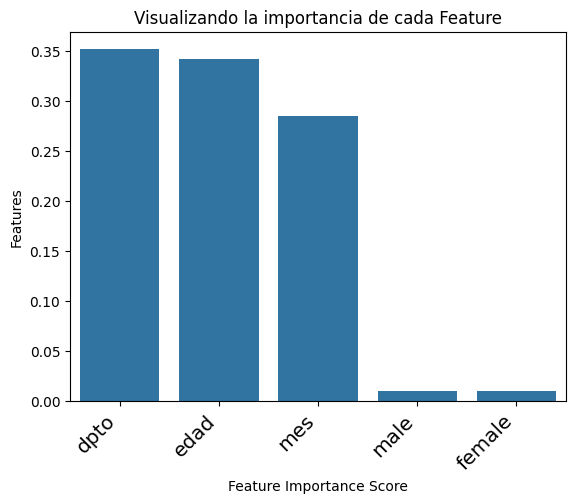

In [ ]:
sns.barplot(x=feature_importances_df.feature,y=feature_importances_df.importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizando la importancia de cada Feature')
plt.xticks(rotation=45,horizontalalignment ="right",fontweight="light",fontsize="x-large")
plt.show()